In [125]:
# describe the data

# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.parse


# Part 1 : Wikispeedia dataset exploration

Let's begin by exploring the Wikispeedia dataset. The dataset is composed of six files:
- articles.tsv, which contains the list of wikipedia articles
- categories.tsv, which contains the list of wikipedia categories
- links.tsv, which contains the list of links between articles
- paths_finished.tsv, which contains the list of human paths finished by the users
- paths_unfinished.tsv, which contains the list of human paths unfinished by the users
- shortest-path-distance-matrix.txt, which contains the shortest path distance between each pair of articles

In [126]:
# Load all the data from the tsv files, skipping the headers and specifying column names
DATA_FOLDER = 'data/wikispeedia_paths-and-graph/'
articles = pd.read_csv(DATA_FOLDER + 'articles.tsv', sep='\t', skiprows=12, names=['article'])
categories = pd.read_csv(DATA_FOLDER + 'categories.tsv', sep='\t', skiprows=12, names=['article', 'category'])
links = pd.read_csv(DATA_FOLDER + 'links.tsv', sep='\t', skiprows=11, names=['linkSource', 'linkTarget'])
paths_finished = pd.read_csv(DATA_FOLDER + 'paths_finished.tsv', sep='\t', skiprows=15, names=['hashedIpAddress', 'timestamp', 'durationInSec', 'path', 'rating'])
paths_unfinished = pd.read_csv(DATA_FOLDER + 'paths_unfinished.tsv', sep='\t', skiprows=16, names=['hashedIpAddress', 'timestamp', 'durationInSec', 'path', 'target', 'type'])

In [127]:
# Decode the URL-encoded article titles
articles = articles.map(urllib.parse.unquote)
categories = categories.map(urllib.parse.unquote)
links = links.map(urllib.parse.unquote)
paths_finished['path'] = paths_finished['path'].map(urllib.parse.unquote)
paths_unfinished['path'] = paths_unfinished['path'].map(urllib.parse.unquote)

### 1.a Articles 

In [128]:
# describe the data
articles.describe()    

,article
count,4604
unique,4604
top,Zulu
freq,1


### 1.b Links

Let's play with the articles and links files to understand the structure of the dataset. There are a lot of articles and links. On average, each article has 26 links to other articles. The United States article has the most links (294). No article has no links. The distribution of the number of links per article is right-skewed.

In [129]:
# describe
links.describe()

,linkSource,linkTarget
count,119882,119882
unique,4587,4135
top,United_States,United_States
freq,294,1551


In [130]:
# get the less popular articles (with 1 link)
less_popular_articles = links['linkSource'].value_counts().loc[lambda x: x ==1].index
less_popular_articles = articles[articles['article'].isin(less_popular_articles)]
less_popular_articles

,article
196,All_your_base_are_belong_to_us
268,Animal_law
931,Classic_female_blues
1189,Dewey_Square
1373,Emma_Roberts
1600,Friend_Directdebit
1890,Hello_Garci_scandal
2026,Human_abdomen
2027,Human_dignity
2112,Inductance


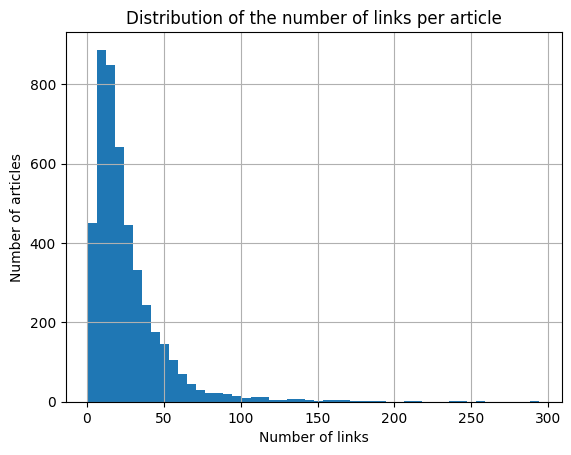

,linkTarget
count,4587.000000
mean,26.135165
std,24.194229
min,1.000000
25%,11.000000
50%,19.000000
75%,33.000000
max,294.000000


In [131]:

# plot the distribution of the number of links per article
links_per_article = links.groupby('linkSource').count()
links_per_article.hist(bins=50)
plt.title('Distribution of the number of links per article')
plt.xlabel('Number of links')
plt.ylabel('Number of articles')
plt.show()

# get the mean, median, min and max number, std of links per article
links_per_article.describe()


In [132]:
# get the distribution of the number of links per article
links_per_article['linkTarget'].value_counts()


linkTarget
14     164
11     163
16     157
13     156
10     154
      ... 
122      1
168      1
294      1
131      1
140      1
Name: count, Length: 154, dtype: int64

Here, let's play with a graph representation of the articles and links. Choose an article! 

In [133]:
# creating a graph 
import networkx as nx

# Initialize directed graph
G = nx.DiGraph()

# creating a dataframe of edges
edges = links[['linkSource', 'linkTarget']]
# Add edges to the graph
G.add_edges_from(edges.values)  # Assuming edges is a DataFrame with columns [linksource, linktarget]

print(f"Graph has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")


Graph has 4592 nodes and 119882 edges.


In [134]:
# Nodes with total degree < 50
low_total_degree_nodes = [node for node, degree in G.degree() if degree < 50]

# Nodes with in-degree < 50
low_in_degree_nodes = [node for node, in_degree in G.in_degree() if in_degree < 50]

# Nodes with out-degree < 50
low_out_degree_nodes = [node for node, out_degree in G.out_degree() if out_degree < 50]

print("Nodes with total degree less than 50:", low_total_degree_nodes)
print("Nodes with in-degree less than 50:", low_in_degree_nodes)
print("Nodes with out-degree less than 50:", low_out_degree_nodes)


Nodes with total degree less than 50: ['Áedán_mac_Gabráin', 'Bede', 'Columba', 'Dál_Riata', 'Picts', 'Åland', 'Nationality', 'Édouard_Manet', 'Absinthe', 'Claude_Monet', 'Diego_Velázquez', 'Francisco_Goya', 'Impressionism', 'Landscape', 'Photography', 'Éire', 'Óengus_I_of_the_Picts', 'Durham', 'Mercia', '€2_commemorative_coins', 'Cathedral_of_Magdeburg', 'Miguel_de_Cervantes', 'Numismatics', 'Sanssouci', 'Suffrage', 'Dark_Ages', 'Great_Moravia', 'Battle_of_Hastings', 'Canute_the_Great', 'Domesday_Book', 'East-West_Schism', 'Edward_the_Confessor', 'First_Crusade', 'Leif_Ericson', 'Macbeth_of_Scotland', 'Norman_conquest_of_England', 'Angkor_Wat', 'Francis_of_Assisi', 'Frederick_II,_Holy_Roman_Emperor', 'Henry_II_of_England', 'Richard_I_of_England', 'Saladin', 'Second_Crusade', 'The_Anarchy', 'Thomas_Becket', 'Bantu', 'Marco_Polo', 'Thomas_Aquinas', 'Abacus', "English_peasants'_revolt_of_1381", 'Ibn_Battuta', '15th_Marine_Expeditionary_Unit', 'Kuwait_City', 'Mogadishu', 'Mount_Pinatubo', 

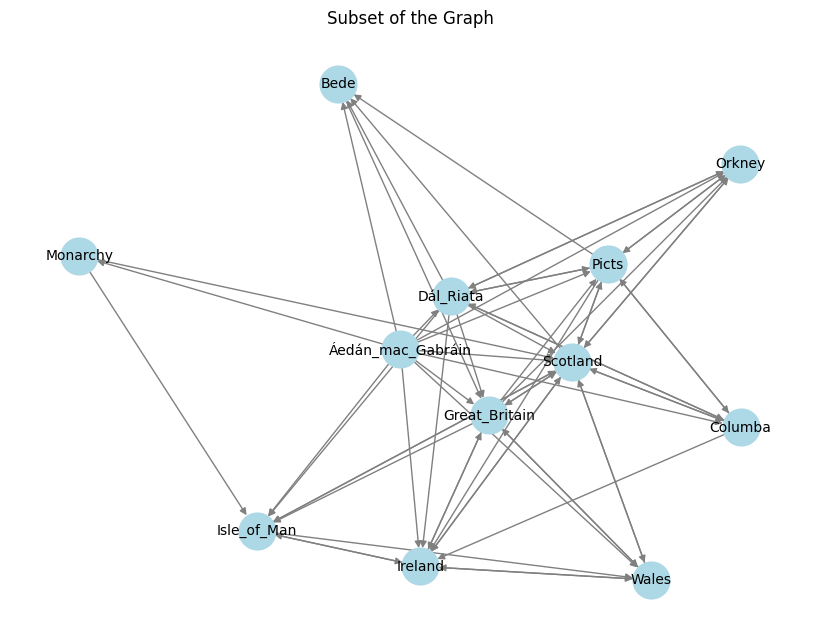

In [135]:
# Get neighbors of a specific node (e.g., 'A')
node_of_interest = low_total_degree_nodes[0]
neighbors = list(G.successors(node_of_interest)) + [node_of_interest]

# Create a subgraph from the selected nodes
subgraph = G.subgraph(neighbors)

# Draw the subgraph
plt.figure(figsize=(8, 6))
nx.draw(
    subgraph,
    with_labels=True,
    node_size=700,
    node_color="lightblue",
    font_size=10,
    edge_color="gray",
)
plt.title("Subset of the Graph")
plt.show()


In [136]:
# get the 5 articles with the highest in-degree
in_degrees = G.in_degree()

# Sort the articles by in-degree
sorted_in_degrees = sorted(in_degrees, key=lambda x: x[1], reverse=True)

# Get the top 5 articles with the highest in-degree
top_5_in_degrees = sorted_in_degrees[:5]

# Print the top 5 articles with the highest in-degree
for article, in_degree in top_5_in_degrees:
    print(f"Article: {article}, In-degree: {in_degree}")

Article: United_States, In-degree: 1551
Article: United_Kingdom, In-degree: 972
Article: France, In-degree: 959
Article: Europe, In-degree: 933
Article: World_War_II, In-degree: 751


In [137]:
# get the 5 articles with the highest out-degree
out_degrees = G.out_degree()

# Sort the articles by out-degree
sorted_out_degrees = sorted(out_degrees, key=lambda x: x[1], reverse=True)

# Get the top 5 articles with the highest out-degree
top_5_out_degrees = sorted_out_degrees[:5]

# Print the top 5 articles with the highest out-degree
for article, out_degree in top_5_out_degrees:
    print(f"Article: {article}, Out-degree: {out_degree}")

Article: United_States, Out-degree: 294
Article: Driving_on_the_left_or_right, Out-degree: 255
Article: List_of_countries, Out-degree: 244
Article: List_of_circulating_currencies, Out-degree: 236
Article: List_of_sovereign_states, Out-degree: 216


### 1.c Categories

We also have access to the categories of the articles. Each article belongs to one or more categories. There is 129 different categories. The article with the most categories is the United States (7). The average number of categories per article is 1.5.

In [138]:
categories.describe()

,article,category
count,5204,5204
unique,4598,129
top,Boyle_Roche,subject.Countries
freq,3,229


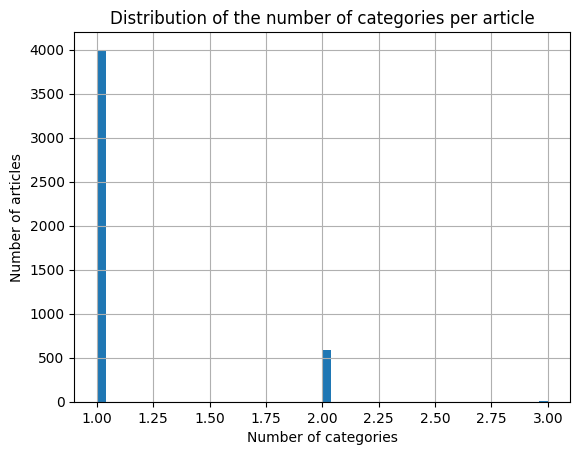

In [139]:
# plot the distribution of the number of categories per article
categories_per_article = categories.groupby('article').count()
categories_per_article.hist(bins=50)
plt.title('Distribution of the number of categories per article')
plt.xlabel('Number of categories')
plt.ylabel('Number of articles')
plt.show()

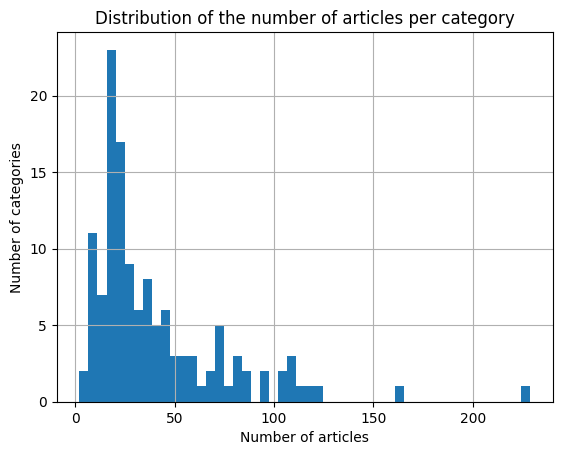

In [140]:
# plot the distribution of the number of articles per category
articles_per_category = categories.groupby('category').count()
articles_per_category.hist(bins=50)
plt.title('Distribution of the number of articles per category')
plt.xlabel('Number of articles')
plt.ylabel('Number of categories')
plt.show()

### 1.d Paths Finished

Lots of people played the game! There are 28718 finished paths. The average path length is 6,75. The shortest path is 1 and the longest is 435. The gamer was probably bored at this point. 

In [141]:
paths_finished.describe()

,timestamp,durationInSec,rating
count,5.131800e+04,51318.000000,28501.000000
mean,1.296384e+09,158.276199,2.269780
std,4.935086e+07,360.841904,1.110439
min,1.219095e+09,0.000000,1.000000
25%,1.250109e+09,60.000000,1.000000
50%,1.283894e+09,107.000000,2.000000
75%,1.345231e+09,183.000000,3.000000
max,1.389823e+09,35091.000000,5.000000


In [142]:
# get the number of unique path finished using unique path_id
paths_finished = pd.read_csv('E:/../../../../paths_finished_unique.tsv', sep='\t', skiprows=1, names=['path_id', 'hashedIpAddress', 'timestamp', 'durationInSec', 'path', 'rating'])
print('Number of rows in paths_finished:', paths_finished.shape[0])

Number of rows in paths_finished: 28718


count    28718.000000
mean         6.672749
std          5.017178
min          1.000000
25%          4.000000
50%          6.000000
75%          8.000000
max        435.000000
Name: path_length, dtype: float64

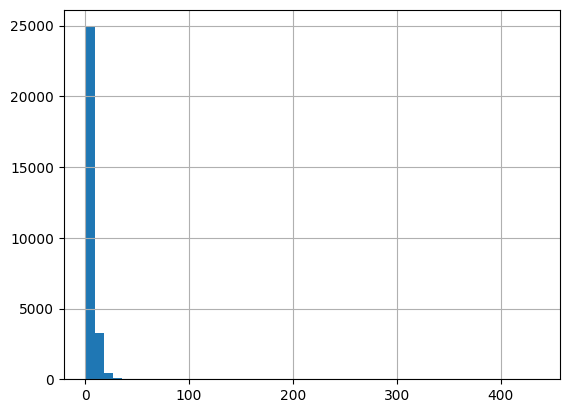

In [143]:
# get the number of steps in the finished paths
paths_finished['path_length'] = paths_finished['path'].apply(lambda x: len(x.split(';')))
paths_finished['path_length'].hist(bins=50)
paths_finished['path_length'].describe()

In [144]:
# get the paths with the longest path length
longest_paths = paths_finished.sort_values(by='path_length', ascending=False)
longest_paths.head()


,path_id,hashedIpAddress,timestamp,durationInSec,path,rating,path_length
26842,26842,7f6da01d55086766,1248928447,2205,United_States;Washington%2C_D.C.;Government;Co...,5.0,435
18090,18090,4f1b9ce764349901,1236685130,2292,Napoleon_I_of_France;United_Kingdom;Great_Brit...,NaN,119
20612,20612,4e97d9af4476607f,1248925083,1141,Police_state;Police;United_States;Washington%2...,5.0,104
15060,15060,0d57c8c57d75e2f5,1290096241,1852,Lake_Toba;Netherlands;Europe;Earth;United_Stat...,5.0,99
7495,7495,6616bb9562890cb9,1222830740,971,David_Beckham;Munich;Onion_dome;Onion;Plant;He...,4.0,86


In [145]:
print(paths_finished.head())

   path_id   hashedIpAddress   timestamp  durationInSec  \
0        0  651ff0fa4fac4471  1227628729             15   
1        1  516b61133d358ce1  1224623308              6   
2        2  32652d6d1c5d9351  1260397548             48   
3        3  0d57c8c57d75e2f5  1296192247             15   
4        4  40111bc7370e59f5  1250228731             92   

                                                path  rating  path_length  
0   %E2%82%AC2_commemorative_coins;Ireland;Irish_Sea     1.0            3  
1                          10th_century;11th_century     1.0            2  
2  10th_century;Maya_civilization;Silver;Coin;Ban...     3.0            5  
3                       10th_century;Germany;Country     1.0            3  
4  10th_century;France;United_States;Basketball;H...     2.0            5  


Do people take a long time to finish the game? The average time is 161 seconds, i.e., 2min 40 s. The longest time is 35091, that is 9h 58min 21s. The shortest time is 0, i.e., the player gave up immediately. Most of the players (80th percentile) took less than 3 minutes, 31 seconds to finish the game.

In [146]:
paths_finished['durationInSec'].describe()


count    28718.000000
mean       161.745386
std        388.877407
min          0.000000
25%         58.000000
50%        105.000000
75%        184.000000
max      35091.000000
Name: durationInSec, dtype: float64

In [147]:
# get the path with the longest duration
longest_duration = paths_finished.sort_values(by='durationInSec', ascending=False)
longest_duration.head()
# print the path with the longest duration
print('Longest duration path:', longest_duration.iloc[0])

Longest duration path: path_id                                                        18718
hashedIpAddress                                     3c623ddc539a389a
timestamp                                                 1262371920
durationInSec                                                  35091
path               Norse_mythology;Literature;Fiction;Computer_an...
rating                                                           NaN
path_length                                                        8
Name: 18718, dtype: object


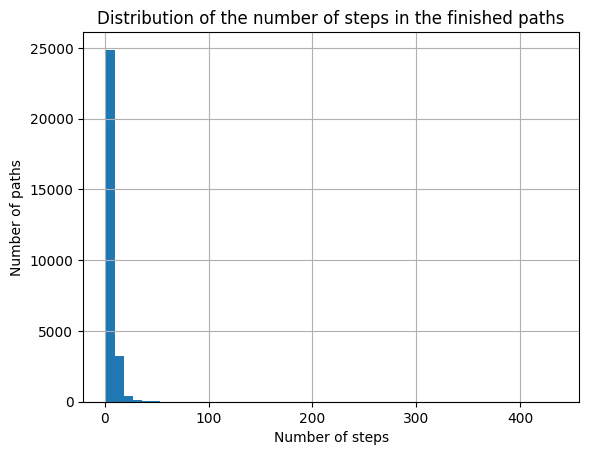

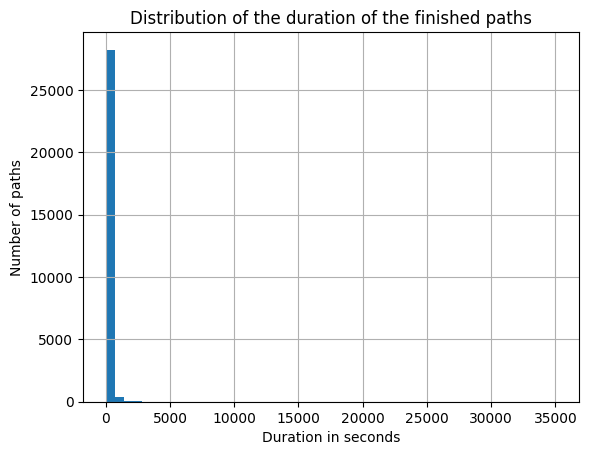

In [148]:
# plot the distribution of the number of steps in the finished paths
paths_finished['path_length'].hist(bins=50)
plt.title('Distribution of the number of steps in the finished paths')
plt.xlabel('Number of steps')
plt.ylabel('Number of paths')
plt.show()

# plot the distribution of the duration of the finished paths
paths_finished['durationInSec'].hist(bins=50)
plt.title('Distribution of the duration of the finished paths')
plt.xlabel('Duration in seconds')
plt.ylabel('Number of paths')
plt.show()




In [149]:
# get the 98th percentile of the duration of the finished paths
paths_finished['durationInSec'].quantile(0.98)

np.float64(665.0)

In [150]:
# get the 80th percentile of the duration of the finished paths
paths_finished['durationInSec'].quantile(0.80)

np.float64(211.0)

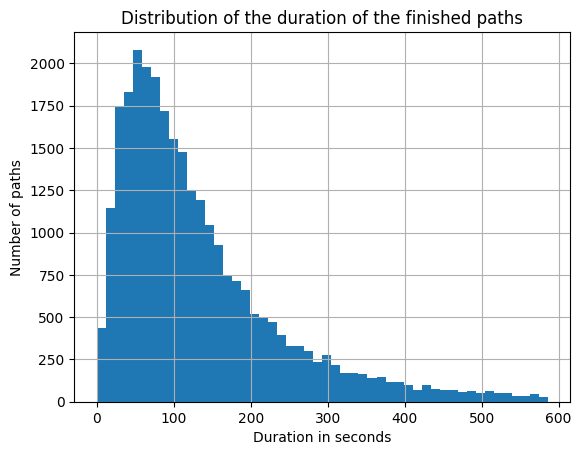

In [151]:
# drop the rows with durationInSec > 587
paths_finished = paths_finished[paths_finished['durationInSec'] < 587]

# plot the distribution of the duration of the finished paths
paths_finished['durationInSec'].hist(bins=50)
plt.title('Distribution of the duration of the finished paths')
plt.xlabel('Duration in seconds')
plt.ylabel('Number of paths')
plt.show()


In [152]:
# get the 98th percentile of the number of steps in the finished paths
paths_finished['path_length'].quantile(0.98)

np.float64(16.0)

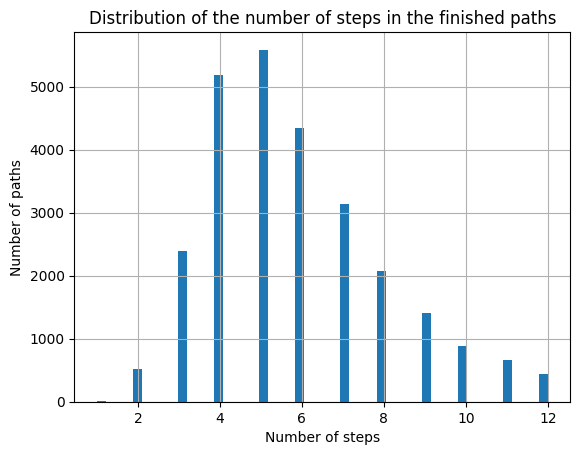

In [153]:
# drop the rows with number of steps > 13
paths_finished_13 = paths_finished[paths_finished['path_length'] < 13]

# plot the distribution of the number of steps in the finished paths
paths_finished_13['path_length'].hist(bins=50)
plt.title('Distribution of the number of steps in the finished paths')
plt.xlabel('Number of steps')
plt.ylabel('Number of paths')
plt.show()

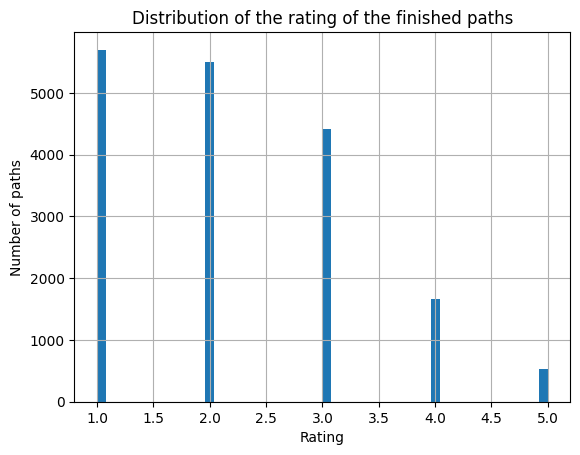

In [154]:
# plot the distribution of the rating of the finished paths
paths_finished['rating'].hist(bins=50)
plt.title('Distribution of the rating of the finished paths')
plt.xlabel('Rating')
plt.ylabel('Number of paths')
plt.show()

In [155]:
# for each row add a column containing the pair of the first and last article in the path
paths_finished['pair'] = paths_finished['path'].apply(lambda x: x.split(';')[0] + ' -> ' + x.split(';')[-1])

print(paths_finished.head())

   path_id   hashedIpAddress   timestamp  durationInSec  \
0        0  651ff0fa4fac4471  1227628729             15   
1        1  516b61133d358ce1  1224623308              6   
2        2  32652d6d1c5d9351  1260397548             48   
3        3  0d57c8c57d75e2f5  1296192247             15   
4        4  40111bc7370e59f5  1250228731             92   

                                                path  rating  path_length  \
0   %E2%82%AC2_commemorative_coins;Ireland;Irish_Sea     1.0            3   
1                          10th_century;11th_century     1.0            2   
2  10th_century;Maya_civilization;Silver;Coin;Ban...     3.0            5   
3                       10th_century;Germany;Country     1.0            3   
4  10th_century;France;United_States;Basketball;H...     2.0            5   

                                          pair  
0  %E2%82%AC2_commemorative_coins -> Irish_Sea  
1                 10th_century -> 11th_century  
2                     10th_century 

### 1.e Paths Unfinished

For different reasons, some people did not finish the game. There are 17845 unfinished paths. The average path length is 6,75. 

In [156]:
paths_unfinished.describe()

,timestamp,durationInSec
count,2.487500e+04,24875.000000
mean,1.344763e+09,835.296884
std,2.772317e+07,881.287961
min,1.297055e+09,4.000000
25%,1.320339e+09,86.000000
50%,1.348587e+09,261.000000
75%,1.367373e+09,1831.000000
max,1.389823e+09,9089.000000


In [157]:
# for each row add a column containing the pair of the first article in the path and the target article
paths_unfinished['pair'] = paths_unfinished['path'].apply(lambda x: x.split(';')[0]) + ' -> ' + paths_unfinished['target']

print(paths_unfinished.head())

    hashedIpAddress   timestamp  durationInSec  \
0  2426091a53125110  1297054935           1804   
1  26141fd878806294  1297055651           1805   
2  2b015fb8181c48f2  1297090819           1818   
3  53a53bc244e08a6a  1297094761             49   
4  53a53bc244e08a6a  1297099105           1808   

                                   path            target     type  \
0                        Obi-Wan_Kenobi         Microsoft  timeout   
1                         Julius_Caesar           Caracas  timeout   
2  Malawi;Democracy;Alexander_the_Great     First_Crusade  timeout   
3                              Paraguay  Mount_St._Helens  restart   
4                      Paraguay;Bolivia  Mount_St._Helens  timeout   

                           pair  
0   Obi-Wan_Kenobi -> Microsoft  
1      Julius_Caesar -> Caracas  
2       Malawi -> First_Crusade  
3  Paraguay -> Mount_St._Helens  
4  Paraguay -> Mount_St._Helens  


In [158]:
# get the number of unique path unfinished using unique path_id
paths_unfinished_unique = paths_unfinished.drop_duplicates(subset='pair')

print('Number of rows in paths_unfinished:', paths_unfinished_unique.shape[0])

Number of rows in paths_unfinished: 18190


Let's look at some paths that some users finished and some that they did not finish. There are 13866 common paths between the finished and unfinished paths. 

In [159]:
# compare the finished pairs with the unfinished pairs and get the number of common pairs
common_pairs = paths_finished['pair'].isin(paths_unfinished['pair'])

print(common_pairs.sum())

3945


It's interesting to see that the average rating of the common pair is 2,63. It's higher than the average rating of the finished paths (2,20). We can see that the shape of the distribution of the ratings is decreasing for the finished paths but increasing between 1 and 3 for the unfinished paths then decreasing.

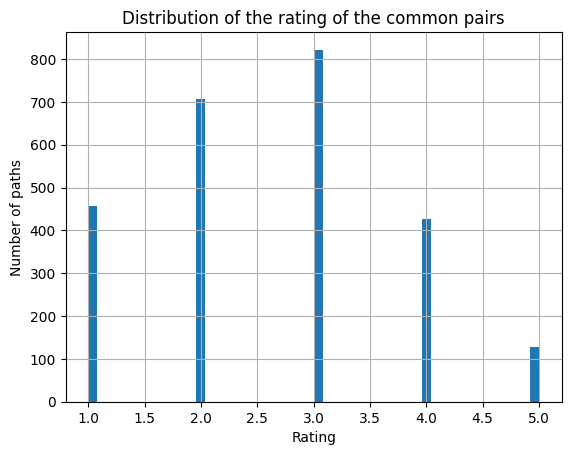

In [160]:
# get the distribution of the rating of the common pairs

common_pairs_rating = paths_finished[paths_finished['pair'].isin(paths_unfinished['pair'])]['rating']
common_pairs_rating.hist(bins=50)
plt.title('Distribution of the rating of the common pairs')
plt.xlabel('Rating')
plt.ylabel('Number of paths')
plt.show()


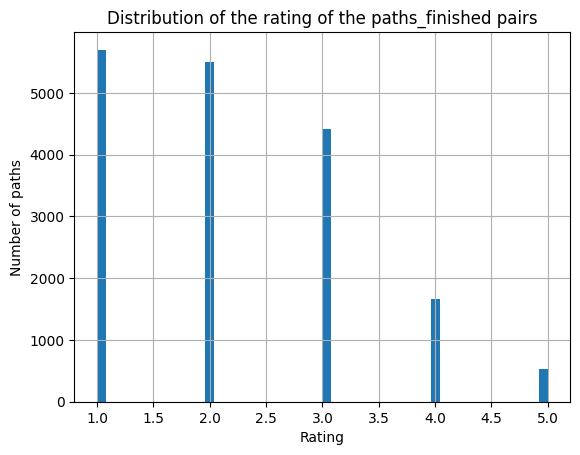

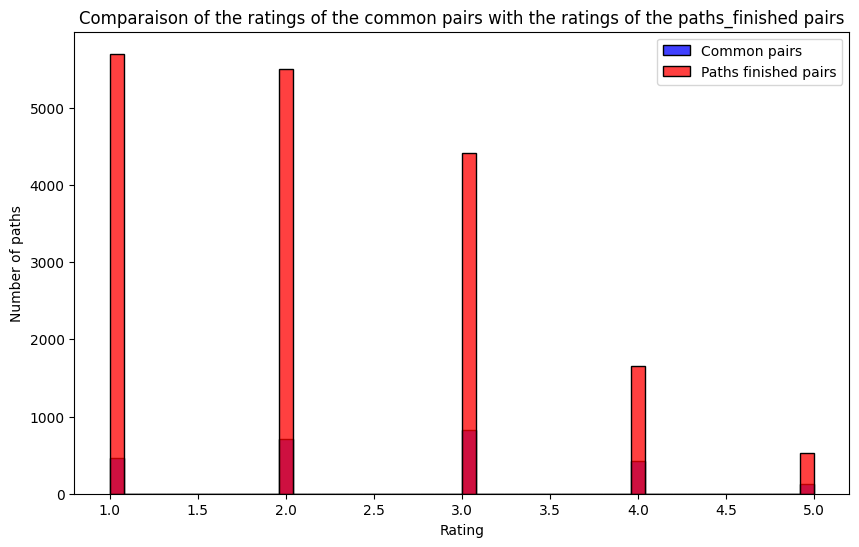

In [161]:
# get the distribution of the rating of the paths_finished pairs
paths_finished_rating = paths_finished['rating']
paths_finished_rating.hist(bins=50)
plt.title('Distribution of the rating of the paths_finished pairs')
plt.xlabel('Rating')
plt.ylabel('Number of paths')
plt.show()

# plot the comparaison the ratings of the common pairs with the ratings of the paths_finished pairs
plt.figure(figsize=(10, 6))
sns.histplot(common_pairs_rating, bins=50, color='blue', label='Common pairs')
sns.histplot(paths_finished_rating, bins=50, color='red', label='Paths finished pairs')
plt.title('Comparaison of the ratings of the common pairs with the ratings of the paths_finished pairs')
plt.xlabel('Rating')
plt.ylabel('Number of paths')
plt.legend()
plt.show()

In [162]:
common_pairs_rating.describe()

count    2542.000000
mean        2.630606
std         1.109534
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: rating, dtype: float64

In [163]:
paths_finished_rating.describe()

count    17791.000000
mean         2.201844
std          1.078957
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: rating, dtype: float64

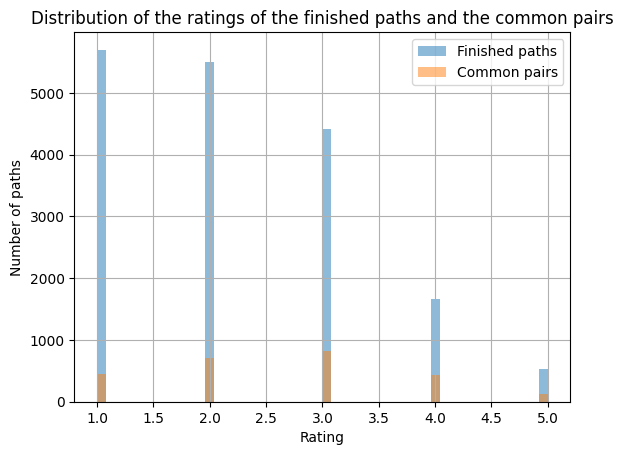

In [164]:
# compare the distribution of the ratings of the finished paths and the common pairs normalized by the number of paths
paths_finished['rating'].hist(bins=50, alpha=0.5, label='Finished paths')
common_pairs_rating.hist(bins=50, alpha=0.5, label='Common pairs')
plt.title('Distribution of the ratings of the finished paths and the common pairs')
plt.xlabel('Rating')
plt.ylabel('Number of paths')
plt.legend()
plt.show()


Look at the distribution of the duration of the unfinished paths. It seems that we have 2 plots. The first one corresponds to the duration less than 30min. The second one corresponds to the duration greater than 30min. The first correspond to the paths that end with a restard and the second one to the paths that end with a give up or timeout.

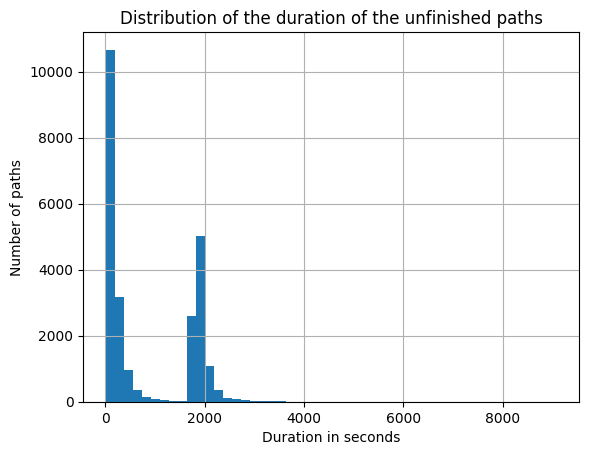

In [165]:
# plot the distribution of the duration of the unfinished paths
paths_unfinished['durationInSec'].hist(bins=50)
plt.title('Distribution of the duration of the unfinished paths')
plt.xlabel('Duration in seconds')
plt.ylabel('Number of paths')
plt.show()

In [166]:
# get the 98th percentile of the duration of the unfinished paths
paths_unfinished['durationInSec'].quantile(0.98)

np.float64(2262.0)

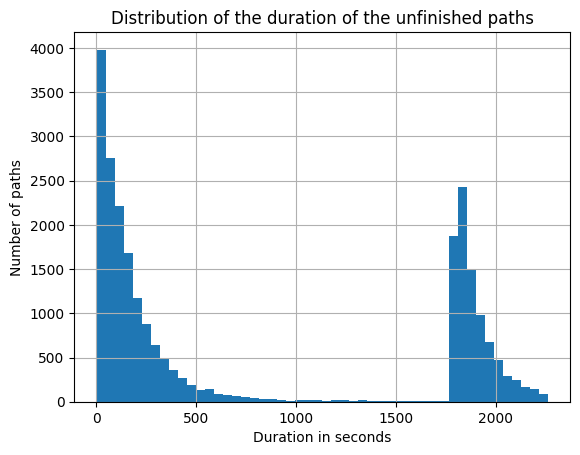

In [167]:
# drop the rows with durationInSec > 2262
paths_unfinished = paths_unfinished[paths_unfinished['durationInSec'] < 2262]

# plot the distribution of the duration of the unfinished paths
paths_unfinished['durationInSec'].hist(bins=50)
plt.title('Distribution of the duration of the unfinished paths')
plt.xlabel('Duration in seconds')
plt.ylabel('Number of paths')
plt.show()

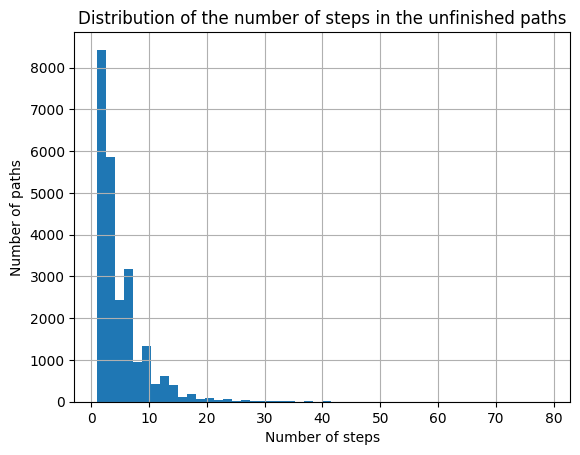

In [168]:
# plot the distribution of the number of steps in the unfinished paths
paths_unfinished['path_length'] = paths_unfinished['path'].apply(lambda x: len(x.split(';')))
paths_unfinished['path_length'].hist(bins=50)
plt.title('Distribution of the number of steps in the unfinished paths')
plt.xlabel('Number of steps')
plt.ylabel('Number of paths')
plt.show()

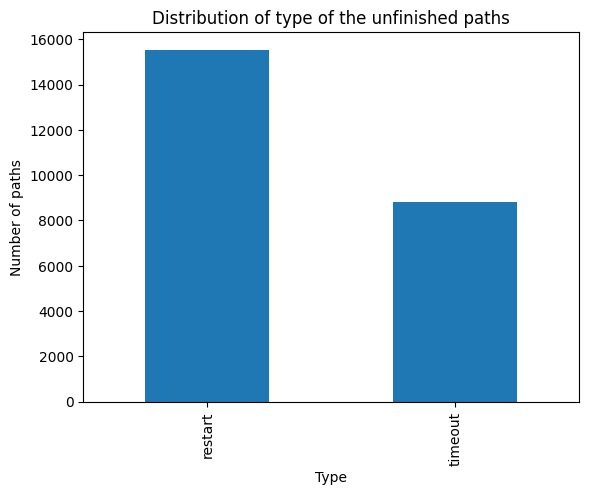

In [169]:
# plot the distribution of type of the unfinished paths
paths_unfinished['type'].value_counts().plot(kind='bar')
plt.title('Distribution of type of the unfinished paths')
plt.xlabel('Type')
plt.ylabel('Number of paths')
plt.show()

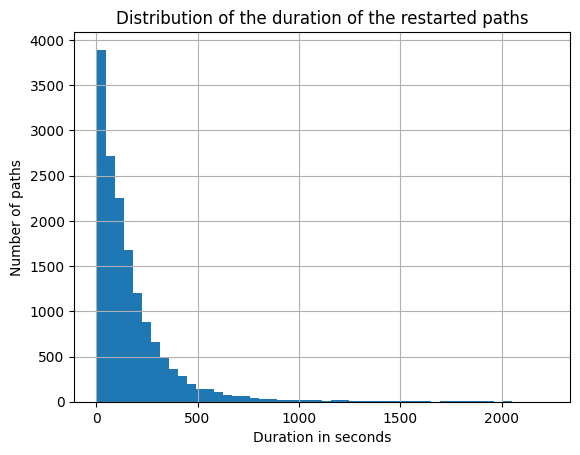

In [170]:
# plot the distribution of the duration of the restarted paths
paths_unfinished[paths_unfinished['type'] == 'restart']['durationInSec'].hist(bins=50)
plt.title('Distribution of the duration of the restarted paths')
plt.xlabel('Duration in seconds')
plt.ylabel('Number of paths')
plt.show()

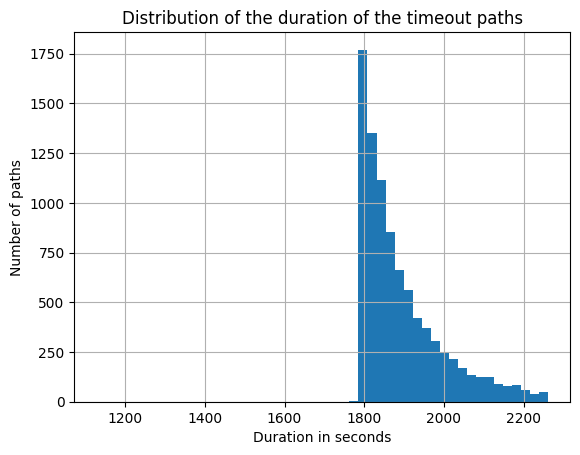

In [171]:
# plot the distribution of the duration of the timeout paths
paths_unfinished[paths_unfinished['type'] == 'timeout']['durationInSec'].hist(bins=50)
plt.title('Distribution of the duration of the timeout paths')
plt.xlabel('Duration in seconds')
plt.ylabel('Number of paths')
plt.show()


On average, the paths that end with a restart have a lower number of steps that the timeout. We cannot conclude anything particular about that because there are different reasons why a player restarts or timeout the game.

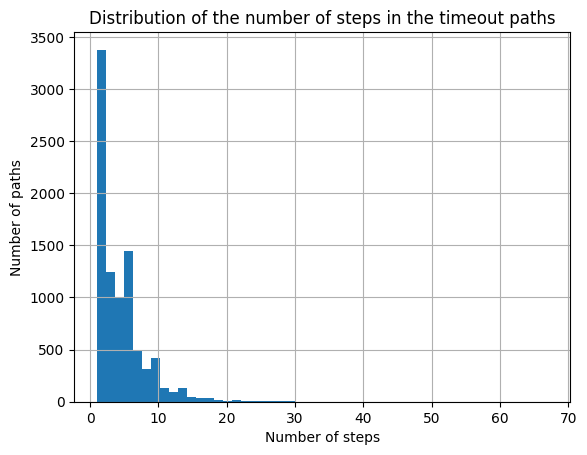

In [172]:
# plot the distribution of the number of steps in the timeout paths
paths_unfinished[paths_unfinished['type'] == 'timeout']['path_length'].hist(bins=50)
plt.title('Distribution of the number of steps in the timeout paths')
plt.xlabel('Number of steps')
plt.ylabel('Number of paths')
plt.show()

In [173]:
# get the 98th percentile of the number of steps in the timeout paths
paths_unfinished[paths_unfinished['type'] == 'timeout']['path_length'].quantile(0.98)

np.float64(15.0)

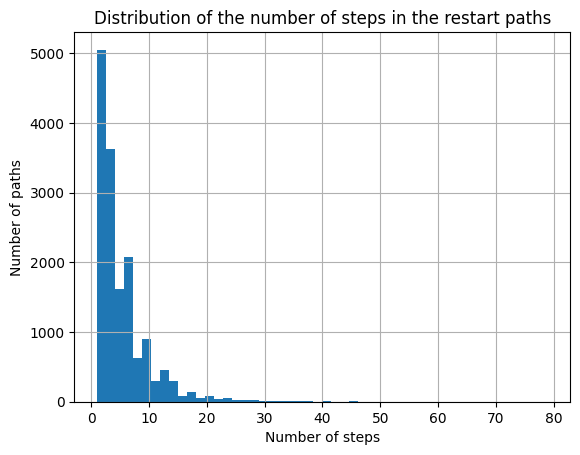

In [174]:
# plot the distribution of the number of steps of restart paths
paths_unfinished[paths_unfinished['type'] == 'restart']['path_length'].hist(bins=50)
plt.title('Distribution of the number of steps in the restart paths')
plt.xlabel('Number of steps')
plt.ylabel('Number of paths')
plt.show()

In [175]:
# get the 98th percentile of the number of steps in the restart paths
paths_unfinished[paths_unfinished['type'] == 'restart']['path_length'].quantile(0.98)

np.float64(20.0)

In [178]:
# describe the data
paths_unfinished[paths_unfinished['type'] == 'restart']['path_length'].describe()

count    15546.000000
mean         5.227904
std          5.079880
min          1.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         79.000000
Name: path_length, dtype: float64

In [179]:
paths_unfinished[paths_unfinished['type'] == 'timeout']['path_length'].describe()

count    8830.000000
mean        4.344281
std         3.802274
min         1.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        67.000000
Name: path_length, dtype: float64

# Part 2 : The article similarity dataset

For our project, we created a dataset that contains the similarity between each pair of articles that a human player goes to. 

In [180]:
# load the data from the csv file data/article_similarities
article_similarities = pd.read_csv('E:/../../../../article_similarities.csv')

# describe the data
article_similarities.describe()

,cosine_similarity,euclidean_distance,sbert_cosine_similarity
count,91844.000000,91844.000000,91844.000000
mean,0.632313,7.641662,0.328520
std,0.156707,2.261004,0.194607
min,0.157769,0.000000,-0.107322
25%,0.522155,6.598946,0.203596
50%,0.616252,8.002598,0.285016
75%,0.741831,9.092360,0.397708
max,1.000001,13.611164,1.000000


We wanted to compare three calculs of similarities between articles. 

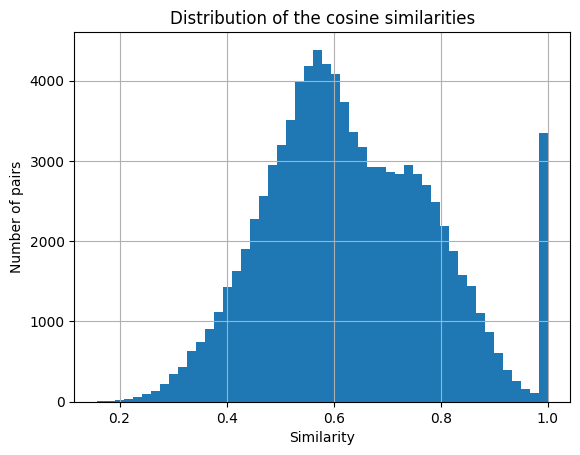

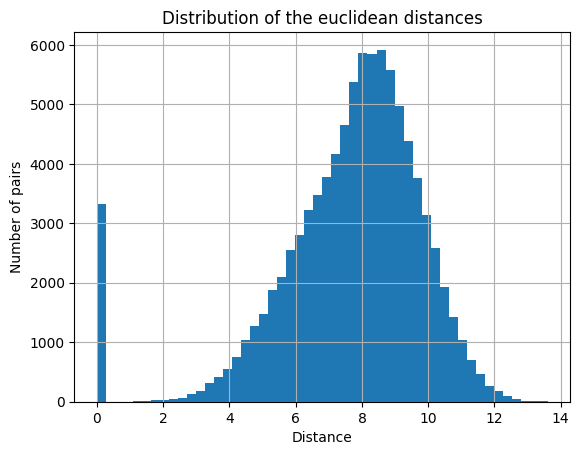

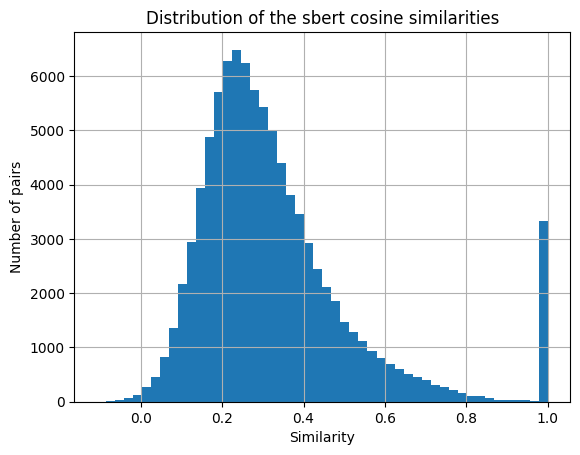

In [84]:
# plot the distribution of the cosine similarities
article_similarities['cosine_similarity'].hist(bins=50)
plt.title('Distribution of the cosine similarities')
plt.xlabel('Similarity')
plt.ylabel('Number of pairs')
plt.show()

# plot the distribution of the euclidean distances
article_similarities['euclidean_distance'].hist(bins=50)
plt.title('Distribution of the euclidean distances')
plt.xlabel('Distance')
plt.ylabel('Number of pairs')
plt.show()

# plot the distribution of the sbert distances
article_similarities['sbert_cosine_similarity'].hist(bins=50)
plt.title('Distribution of the sbert cosine similarities')
plt.xlabel('Similarity')
plt.ylabel('Number of pairs')
plt.show()


In [88]:
# normalize the euclidean distances
article_similarities['euclidean_distance'] = article_similarities['euclidean_distance'] / article_similarities['euclidean_distance'].max()

# for each row add the mean of the 3 similarity calculations, the median and the std
article_similarities['mean'] = article_similarities[['cosine_similarity', 'euclidean_distance', 'sbert_cosine_similarity']].mean(axis=1)
article_similarities['median'] = article_similarities[['cosine_similarity', 'euclidean_distance', 'sbert_cosine_similarity']].median(axis=1)
article_similarities['std'] = article_similarities[['cosine_similarity', 'euclidean_distance', 'sbert_cosine_similarity']].std(axis=1)

print(article_similarities.head())


                              pair  cosine_similarity  euclidean_distance  \
0     ('Football', 'South_Africa')           0.551181            0.641088   
1            ('Film', 'The_Lorax')           0.438971            0.707492   
2             ('Africa', 'Bhutan')           0.752173            0.483110   
3           ('Norway', 'Slovenia')           0.830125            0.407875   
4  ('Chemistry', 'Carbon_dioxide')           0.600274            0.628461   

   sbert_cosine_similarity      mean    median       std  
0                 0.173412  0.455227  0.551181  0.248164  
1                 0.257352  0.467938  0.438971  0.226464  
2                 0.204073  0.479785  0.483110  0.274065  
3                 0.609644  0.615881  0.609644  0.211194  
4                 0.393729  0.540821  0.600274  0.128163  


In [89]:
# print the 10 most similar pairs
article_similarities.sort_values(by='mean', ascending=False).head(10)

,pair,cosine_similarity,euclidean_distance,sbert_cosine_similarity,mean,median,std
31771,"('Geology', 'Eocene')",0.716480,0.582482,1.0,0.766321,0.716480,0.213174
3285,"('Star_Wars', 'Super_Mario_Bros.')",0.693688,0.597951,1.0,0.763880,0.693688,0.210014
66060,"('Magnetism', 'Electronics')",0.741356,0.549339,1.0,0.763565,0.741356,0.226150
8294,"('Agriculture', 'Sorghum')",0.633092,0.657519,1.0,0.763537,0.657519,0.205147
42075,"('Mathematics', 'Renormalization')",0.665077,0.625041,1.0,0.763373,0.665077,0.205901
23624,"('U.S._state', 'Mount_St._Helens')",0.611933,0.677574,1.0,0.763169,0.677574,0.207711
53247,"('Scooby-Doo', 'Looney_Tunes')",0.768285,0.520576,1.0,0.762954,0.768285,0.239757
53186,"('Pablo_Picasso', 'Cubism')",0.699025,0.589264,1.0,0.762763,0.699025,0.212657
50030,"('Carboniferous', 'Pelycosaur')",0.508011,0.780061,1.0,0.762691,0.780061,0.246454
44923,"('Elizabeth_II_of_the_United_Kingdom', 'Henry_...",0.804776,0.482218,1.0,0.762331,0.804776,0.261487


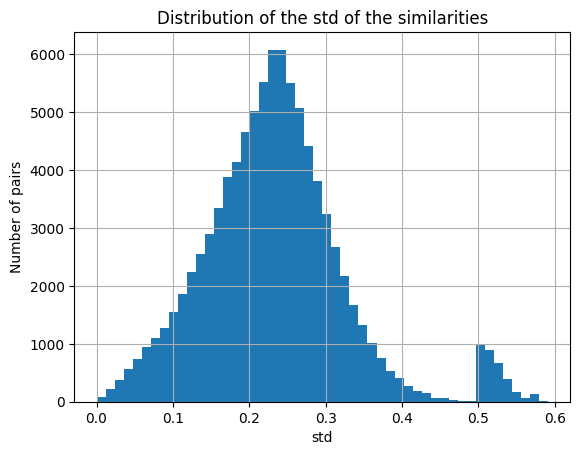

count    91844.000000
mean         0.233885
std          0.093977
min          0.000518
25%          0.175766
50%          0.230769
75%          0.280590
max          0.591007
Name: std, dtype: float64

In [91]:
# plot the distribution of the std of the similarities
article_similarities['std'].hist(bins=50)
plt.title('Distribution of the std of the similarities')
plt.xlabel('std')
plt.ylabel('Number of pairs')
plt.show()

article_similarities['std'].describe()

In [97]:
# Initialize an undirected graph (or directed if the similarity is asymmetric)
G = nx.Graph()

# Add weighted edges to the graph
for _, row in article_similarities.iterrows():
    cleaned = row['pair'].strip("()").replace("'", "").split(", ")

    first_element = cleaned[0]
    second_element = cleaned[1]
    
    G.add_edge(first_element, second_element, weight=row['cosine_similarity'])

# Print basic graph info
print(f"Graph has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")

Graph has 3848 nodes and 87791 edges.


In [100]:
# Nodes with total degree < 50
low_total_degree_nodes = [node for node, degree in G.degree() if degree < 50]


print("Nodes with total degree less than 50:", low_total_degree_nodes)


Nodes with total degree less than 50: ['The_Lorax', 'Bhutan', 'Slovenia', 'Hawking_radiation', 'Ramesses_II', 'Fern', 'List_of_French_monarchs', 'Symmetry', 'Pablo_Picasso', 'James_K._Polk', 'Isaac_Asimov', 'Ununhexium', 'Iridium', 'Igneous_rock', 'Arable_land', 'Haemophilia', 'Basking_shark', 'Hurricane_Floyd', 'Nairobi', 'Fauna_of_Australia', 'Alexander_Graham_Bell', 'Mosaic', 'Berkelium', 'Krill', 'Stonehenge', 'Celtic_mythology', 'Beaver', 'Vienna', 'HD_209458_b', 'Luminiferous_aether', 'Kuala_Lumpur', 'Darmstadtium', 'Henry_David_Thoreau', 'Andes', 'Family', 'Channel_Islands', 'Spanish_Armada', 'Royal_Marines', 'Quark', 'Invasive_species', 'Nitrification', 'Boston_RFC', 'Tim_Henman', 'Taj_Mahal', '14th_century', 'Ununquadium', 'Liberia', 'Freetown', 'Calligraphy', 'Ben_Nevis', 'Alfred_Hitchcock', 'Bismuth', 'Mount_Vesuvius', 'Dundee', 'The_Beano', 'Darfur_conflict', 'The_Blitz', 'Tern', 'Neoclassicism', 'The_Lord_of_the_Rings_film_trilogy', 'Vancouver', 'Black_pepper', 'Thomas_Edi

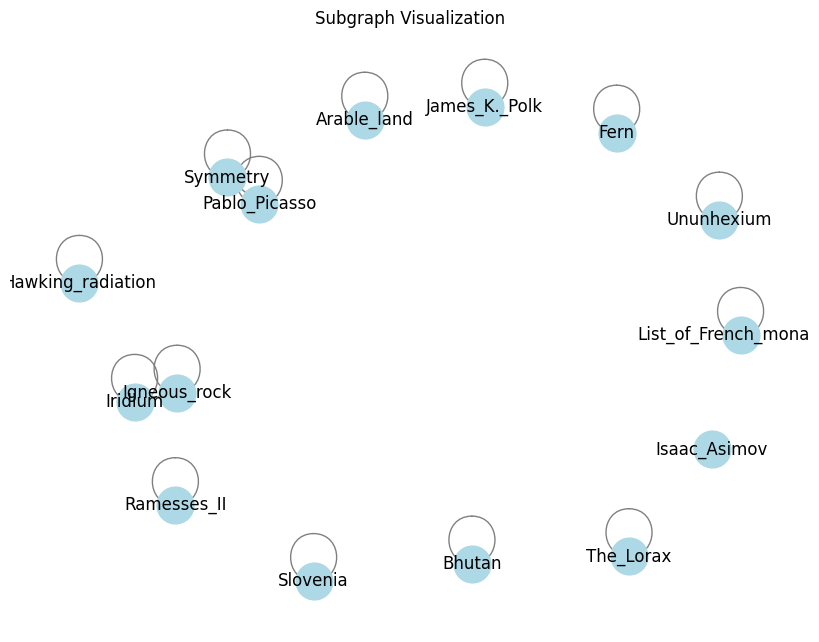

In [113]:
node_of_interest = low_total_degree_nodes[:15]
subgraph = G.subgraph(node_of_interest)


# Draw the subgraph
plt.figure(figsize=(8, 6))

# Use spring layout for node positioning
pos = nx.spring_layout(subgraph)

# Draw the nodes, edges, and labels
nx.draw(subgraph, pos, with_labels=True, node_size=700, node_color="lightblue", font_size=12, edge_color="gray")

# Add title and display
plt.title("Subgraph Visualization")
plt.show()

# Part 3 : The LLM wikispeedia dataset

We make an llm play the game. Let's see how it goes.

In [182]:
# load the data data/llm_paths_all_gpt4omini_no_memory.tsv
llm_paths_all_gpt4omini_no_memory = pd.read_csv('data/llm_paths_all_gpt4omini_no_memory.tsv', sep='\t')

# describe the data
llm_paths_all_gpt4omini_no_memory.describe()

,path_id,steps
count,28718.000000,28718.000000
mean,14358.500000,1.852183
std,8290.316852,2.160350
min,0.000000,0.000000
25%,7179.250000,0.000000
50%,14358.500000,1.000000
75%,21537.750000,3.000000
max,28717.000000,16.000000


On average the llm took 5 steps to finish the game. The longest path is 20.

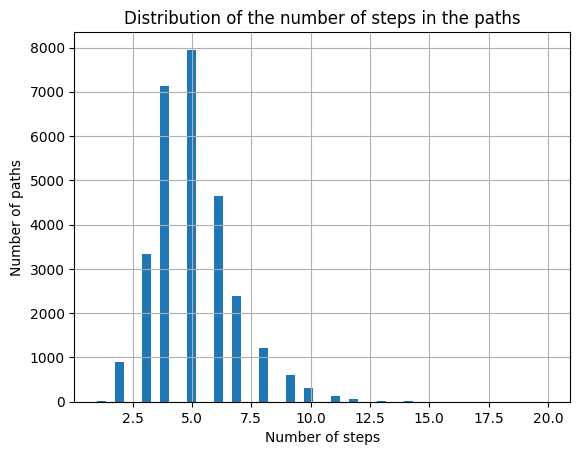

In [183]:
# plot the distribution of the number of steps in the paths
llm_paths_all_gpt4omini_no_memory['path_length'] = llm_paths_all_gpt4omini_no_memory['path'].apply(lambda x: len(x.split(';')))
llm_paths_all_gpt4omini_no_memory['path_length'].hist(bins=50)
plt.title('Distribution of the number of steps in the paths')
plt.xlabel('Number of steps')
plt.ylabel('Number of paths')
plt.show()

In [184]:
llm_paths_all_gpt4omini_no_memory['path_length'].describe()

count    28718.000000
mean         5.072011
std          1.692414
min          1.000000
25%          4.000000
50%          5.000000
75%          6.000000
max         20.000000
Name: path_length, dtype: float64

Look! It tooks generally more steps when it doesn't finish the game. 

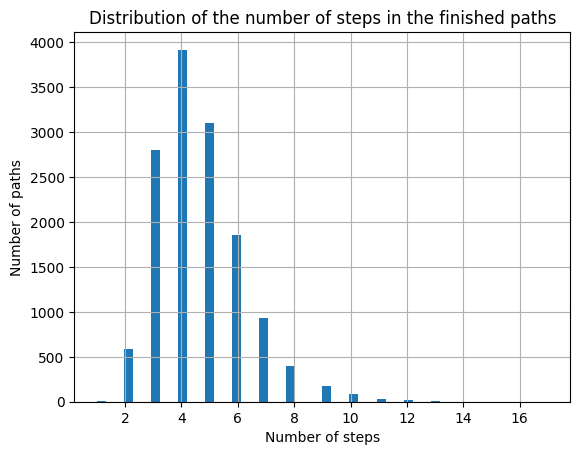

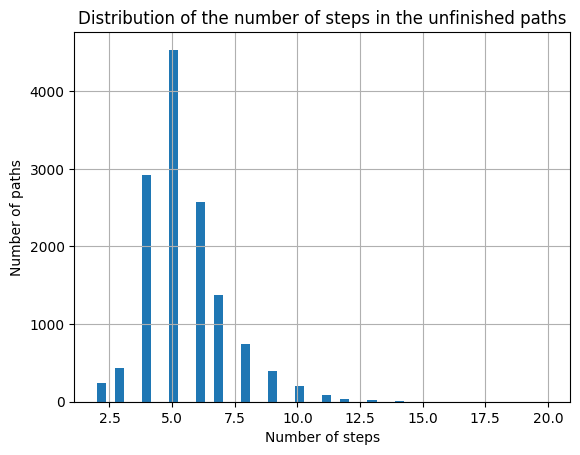

In [108]:
# add a column to the dataset that says if the path is finished or not

# the paths is finished if the path doesn't end with 'LOOP_DETECTED' or 'WRONG_ANSWER'
llm_paths_all_gpt4omini_no_memory['finished'] = llm_paths_all_gpt4omini_no_memory['path'].apply(lambda x: not (x.endswith('LOOP_DETECTED') or x.endswith('WRONG_ANSWER')))

# plot the distribution of the number of steps in the finished paths
llm_paths_all_gpt4omini_no_memory[llm_paths_all_gpt4omini_no_memory['finished']]['path_length'].hist(bins=50)
plt.title('Distribution of the number of steps in the finished paths')
plt.xlabel('Number of steps')
plt.ylabel('Number of paths')
plt.show()

# plot the distribution of the number of steps in the unfinished paths
llm_paths_all_gpt4omini_no_memory[~llm_paths_all_gpt4omini_no_memory['finished']]['path_length'].hist(bins=50)
plt.title('Distribution of the number of steps in the unfinished paths')
plt.xlabel('Number of steps')
plt.ylabel('Number of paths')
plt.show()